In [1]:
import numpy as np

dataset = np.load("PlantDoc_v3.npz")

X_train = dataset["X_train"]
X_test = dataset["X_test"]
y_train = dataset["y_train"]
y_test = dataset["y_test"]

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
model = KNeighborsClassifier(n_neighbors=2, n_jobs=1)

In [4]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=2)

In [5]:
y_pred = model.predict(X_test)

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
print(f"Test Accuracy: {accuracy_score(y_pred, y_test)*100}%")

Test Accuracy: 22.272727272727273%


In [8]:
classes = ["healthy", "early_blight", "late_blight", "bacterial_spot", "mosaic_virus"]
print(classification_report(y_test, y_pred, target_names=classes))

                precision    recall  f1-score   support

       healthy       0.23      0.40      0.29       162
  early_blight       0.24      0.30      0.26       114
   late_blight       0.24      0.21      0.23        84
bacterial_spot       0.17      0.11      0.13        84
  mosaic_virus       0.20      0.10      0.13       216

      accuracy                           0.22       660
     macro avg       0.22      0.22      0.21       660
  weighted avg       0.22      0.22      0.21       660



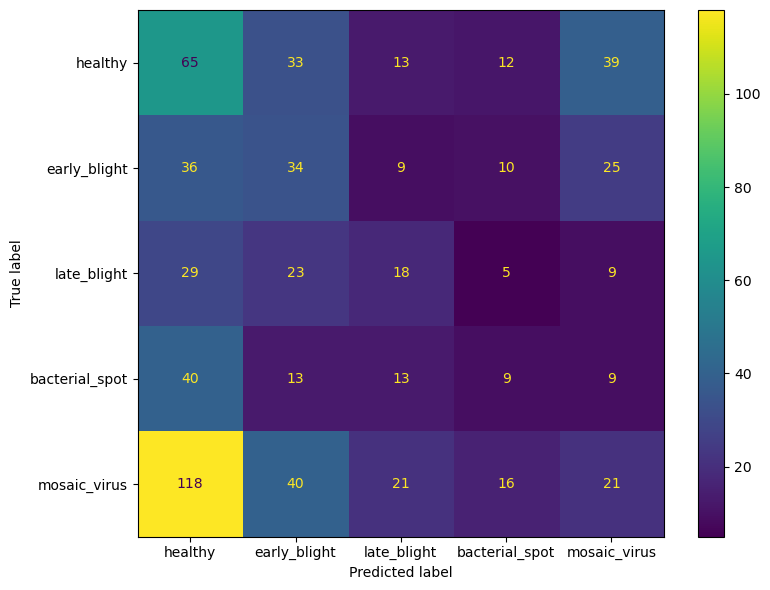

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.tight_layout()